In [3]:
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Path dataset berdasarkan file data.yaml
train_path = 'D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET/car/train/images'
val_path = 'D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET/car/valid/images'
test_path = 'D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET/car/test/images'

In [5]:
import os
# Fungsi untuk menghitung jumlah file gambar dalam folder
def count_images_in_folder(folder_path):
    if os.path.exists(folder_path):
        return len([file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png', '.jpeg'))])
    return 0

# Hitung jumlah data
num_train = count_images_in_folder(train_path)
num_val = count_images_in_folder(val_path)
num_test = count_images_in_folder(test_path)
total_data = num_train + num_val + num_test

# Tampilkan hasil
print(f"Total data: {total_data}")
print(f"Jumlah data train: {num_train}")
print(f"Jumlah data validasi: {num_val}")
print(f"Jumlah data test: {num_test}")

Total data: 4969
Jumlah data train: 3530
Jumlah data validasi: 801
Jumlah data test: 638


In [6]:
# Display random images from the folder
def display_random_images(train_path, num_samples=9):
    # Daftar semua file gambar
    image_files = os.listdir(train_path)
    # Pilih gambar secara acak
    rand_images = random.sample(image_files, num_samples)
    # Buat grid 3x3
    fig, axes = plt.subplots(3, 3, figsize=(11, 11))
    for i, image in enumerate(rand_images):
        ax = axes[i // 3, i % 3]
        ax.imshow(plt.imread(os.path.join(train_path, image)))
        ax.set_title(f'Image {i+1}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [7]:
# Display image dimensions
def display_image_dimensions(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        h, w, c = image.shape
        print(f"The image has dimensions {w}x{h} and {c} channels.")
    else:
        print("Error: Unable to load the image. Please check the file path.")

# Perform object detection with YOLOv8
def perform_object_detection(model_path, image_path):
    model = YOLO(model_path)
    result_predict = model.predict(source=image_path, imgsz=640)
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    plt.imshow(plot)
    plt.axis('off')
    plt.show()

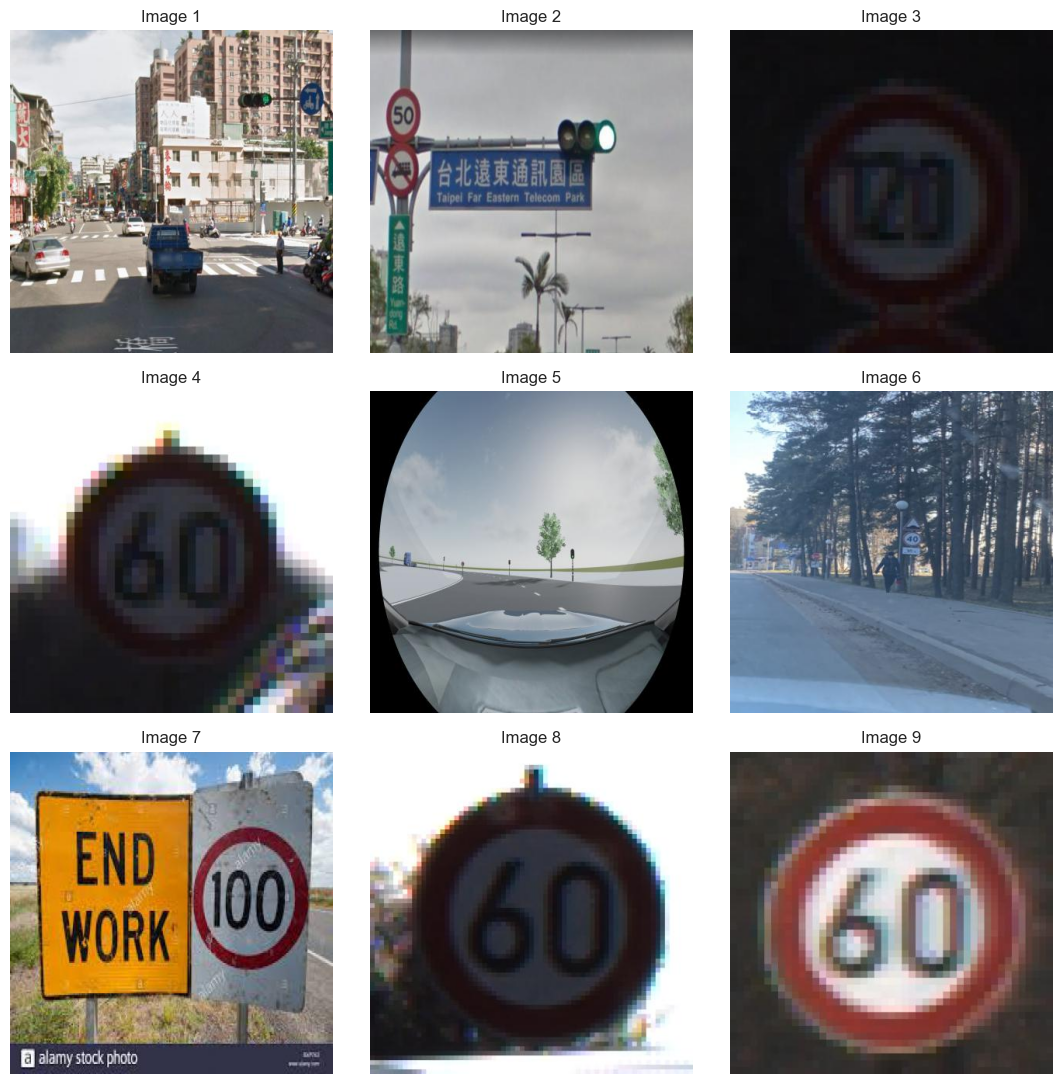

The image has dimensions 416x416 and 3 channels.

image 1/1 D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET\car\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 130.2ms
Speed: 32.5ms preprocess, 130.2ms inference, 14.1ms postprocess per image at shape (1, 3, 640, 640)


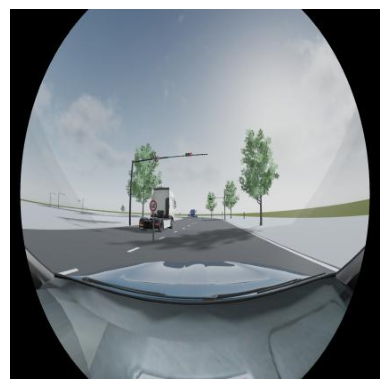

In [8]:
# Usage examples
display_random_images(train_path)

test_image_path = 'D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg'
display_image_dimensions(test_image_path)

yolo_model_path = "yolov8n.pt"
detection_image_path = 'D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg'
perform_object_detection(yolo_model_path, detection_image_path)

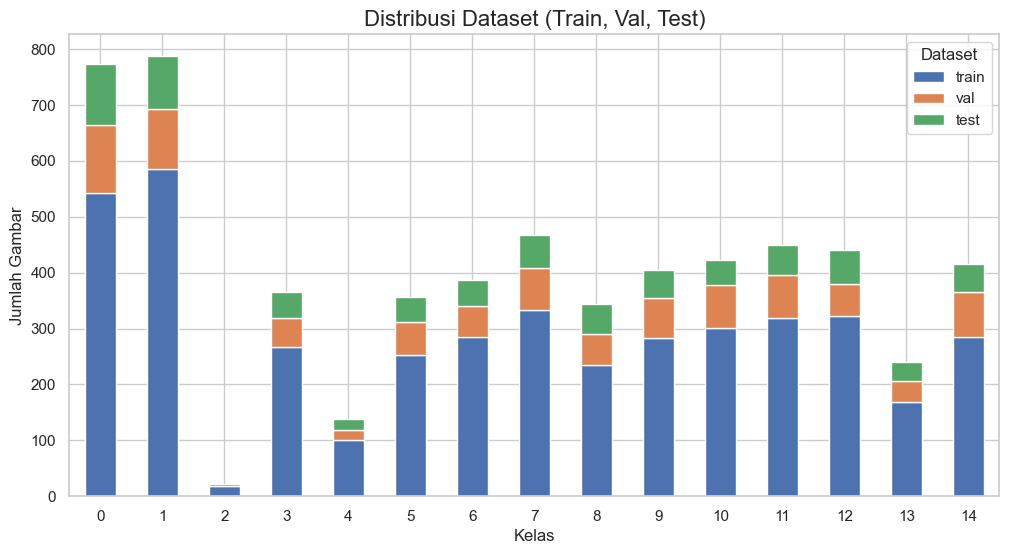

Statistik Total:
class
0     774
1     787
2      22
3     365
4     139
5     356
6     387
7     468
8     343
9     404
10    422
11    449
12    440
13    240
14    416
dtype: int64


In [9]:
import yaml
from collections import Counter

# Path ke file data.yaml
data_yaml_path = 'D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET\car\data.yaml'
model_yaml = 'D:\SMT 7\COMPUTER VISION\FINAL PROJECT\CODE\yolov8n.yaml'

# Fungsi untuk membaca file YAML
def load_yaml(yaml_path):
    with open(yaml_path, 'r') as file:
        return yaml.safe_load(file)

# Memuat data YAML
data_info = load_yaml(data_yaml_path)

# Mendapatkan path untuk train, val, dan test
train_path = data_info['train']
val_path = data_info['val']
test_path = data_info.get('test', None)  # Test mungkin opsional

# Fungsi untuk menghitung jumlah gambar per kelas
def count_images_by_class(data_path):
    class_counts = Counter()
    for label_file in os.listdir(data_path.replace('images', 'labels')):  # Path ke label
        with open(os.path.join(data_path.replace('images', 'labels'), label_file), 'r') as f:
            for line in f:
                class_id = int(line.split()[0])  # Ambil ID kelas
                class_counts[class_id] += 1
    return class_counts

# Hitung statistik untuk train, val, dan test
train_stats = count_images_by_class(train_path)
val_stats = count_images_by_class(val_path)
test_stats = count_images_by_class(test_path) if test_path else {}

# Gabungkan statistik
all_classes = sorted(set(train_stats.keys()).union(val_stats.keys(), test_stats.keys()))
stats = {
    'class': [],
    'train': [],
    'val': [],
    'test': []
}

for cls in all_classes:
    stats['class'].append(cls)
    stats['train'].append(train_stats.get(cls, 0))
    stats['val'].append(val_stats.get(cls, 0))
    stats['test'].append(test_stats.get(cls, 0) if test_stats else 0)

# Visualisasi Statistik Dataset
sns.set(style='whitegrid', rc={'figure.figsize': (12, 6)})
df_stats = pd.DataFrame(stats)
df_stats.set_index('class', inplace=True)
df_stats.plot(kind='bar', stacked=True)
plt.title("Distribusi Dataset (Train, Val, Test)", fontsize=16)
plt.xlabel("Kelas", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Dataset")
plt.show()

# Statistik Total
print("Statistik Total:")
print(df_stats.sum(axis=1))

In [10]:
# Memuat model YOLOv8n yang telah dilatih sebelumnya
Final_model = YOLO('yolov8n.pt')

print(Final_model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

In [ ]:
Result_Final_model = Final_model.train(
    data=data_yaml_path,
    model= model_yaml,
    epochs=50,
    batch=-1,
    optimizer='adamw',
    imgsz=720,
    workers=4,
    device='0',
    save=False,
    patience=10,
    lr0=0.005,               # Learning rate lebih rendah
    lrf=0.2,                 # Learning rate final lebih besar

)

print("Training complete.")

New https://pypi.org/project/ultralytics/8.3.55 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.50  Python-3.9.13 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=D:\SMT 7\COMPUTER VISION\FINAL PROJECT\CODE\yolov8n.yaml, data=D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET\car\data.yaml, epochs=50, time=None, patience=10, batch=-1, imgsz=720, save=False, save_period=-1, cache=False, device=0, workers=4, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=adamw, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, aug

train: Scanning D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET\car\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


AutoBatch: Computing optimal batch size for imgsz=736 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU) 8.00G total, 0.11G reserved, 0.05G allocated, 7.83G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       10.86         0.214         392.3         898.2        (1, 3, 736, 736)                    list
     3013773       21.71         0.367           411         887.9        (2, 3, 736, 736)                    list
     3013773       43.43         0.661         458.4         596.2        (4, 3, 736, 736)                    list
     3013773       86.85         1.242         333.1         527.1        (8, 3, 736, 736)                    list
     3013773       173.7         2.462         446.2         616.5       (16, 3, 736, 736)                    list
AutoBatch: Using batch-size 31 for CUDA:0 4.86G/8.00G (61%) 


train: Scanning D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET\car\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]
val: Scanning D:\SMT 7\COMPUTER VISION\FINAL PROJECT\DATASET\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


In [5]:
import pandas as pd
Result_Final_model = pd.read_csv('D:\SMT 7\COMPUTER VISION\FINAL PROJECT\CODE/runs\detect/train15/results.csv')